# 抖音用户视频偏好分析

**目录**
1. 提出问题
2. 理解数据
 * 采集数据
 * 导入数据
 * 查看数据集信息
3. 数据清洗
 * 数据预处理
 * 特征工程
4. 构建模型及评估
5. 数据可视化
6. 结论与建议

# 1.提出问题

**项目目的：**  
该项目主要研究目的是通过分析抖音的那些大V们，来探索什么样的视频在抖音里最受欢迎，并构建预测模型。

**项目问题：**  
1、抖音大V账号的行为数据的基本情况如何？  
2、什么样的大V拥有更多的粉丝数、点赞数、评论数以及分享数？  
3、抖音大V用户对其他用户的回关度如何？

# 2.理解数据

## 2.1 采集数据    

本次的数据为2018年抖音用户数据，来源于公众号【法纳斯特】  

数据主要包含大V们的昵称、性别、地点、类型、点赞数、粉丝数、视频数、评论数、分享数、关注数、毕业学校、认证、简介等信息。

*（注：由于时间的原因,目前抖音大V的数据会与本次数据分析结果会有一定出入）*

## 2.2 导入数据

In [188]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#安装处理数据包
#! pip install pyecharts
#! pip install echarts-china-provinces-pypkg
#pip install squarify

#导入处理数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
from pyecharts.charts import Map
from pyecharts import options as opts

In [189]:
#导入数据
df = pd.read_csv('D:\BaiduNetdiskDownload\抖音文件\douyin.csv',encoding = 'utf-8-sig')
print('抖音数据集：',df.shape)
print('抖音大V数据集有多少行数据：', df.shape[0])

抖音数据集： (5025, 17)
抖音大V数据集有多少行数据： 5025


## 2.3 查看数据集信息

In [190]:
# 查看数据
df.head()

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名
2,陈赫,1,中国,NaN,上海,上海,明星,68374000,422,570096000,430908721,117639297,131,上海戏剧学院,演员陈赫,NaN,😎帅到没朋友 💁🏻‍♂️有东西直播间 🔜1⃣️1⃣️1⃣️8⃣️🕔 ☑️公众号➰[陈赫]
3,Dear-迪丽热巴,0,NaN,NaN,NaN,NaN,明星,49790000,29,181167000,202448645,151645265,0,NaN,演员,NaN,NaN
4,毒舌电影,1,中国,广东,广州,广州,剧情,46355000,616,820393000,28026109,13005392,24,NaN,优质影视自媒体、抖音影评团成员,NaN,看电影， 可以改变人生。 商务邮：dsmovie@youhaoxi.cn ❤️ 日历预售...


In [191]:
#获取数据类型列的描述统计信息
'''
describe只描述查看数据类型信息，对于其他类型数据不显示,比如字符串类型姓名（name），国家（country）等
因为描述统计指标是计算数值，所以需要该列的数据类型是数据
'''
df.describe()

,fans,videos,likes,comments,shares
count,5.025000e+03,5025.000000,5.025000e+03,5.025000e+03,5.025000e+03
mean,4.707163e+06,393.217512,5.276010e+07,1.099046e+08,9.329155e+07
std,5.160106e+06,973.050504,1.021082e+08,2.910797e+08,2.634487e+08
min,1.472000e+06,1.000000,1.270000e+02,0.000000e+00,0.000000e+00
25%,1.904000e+06,89.000000,1.335300e+07,1.366666e+07,8.023916e+06
50%,3.418000e+06,174.000000,2.739000e+07,3.934100e+07,2.687126e+07
75%,5.438000e+06,324.000000,5.618500e+07,1.017726e+08,7.579052e+07
max,1.172590e+08,16000.000000,3.814572e+09,1.190678e+10,9.089061e+09


根据上面描述统计信息，其中有5列为数据型描述统计，并且均为5025行数据，没有缺失值

In [192]:
#查看每一列数据的类型和数据总和
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5025 non-null   object
 1   gender             5025 non-null   object
 2   country            4684 non-null   object
 3   province           3766 non-null   object
 4   city               4480 non-null   object
 5   location           4299 non-null   object
 6   category           5025 non-null   object
 7   fans               5025 non-null   int64 
 8   videos             5025 non-null   int64 
 9   likes              5025 non-null   int64 
 10  comments           5025 non-null   int64 
 11  shares             5025 non-null   int64 
 12  following          5025 non-null   object
 13  school             1264 non-null   object
 14  custom_verify      1567 non-null   object
 15  enterprise_verify  504 non-null    object
 16  signature          4793 non-null   object


这里发现数据总行为5025行。其中数据类型列均无缺失值，而字符串列存在缺失值。 

具体表现在名字（name）、性别（gender）、类型（category）、粉丝（fans）、视频量（videos）、点赞次数（likes）、评论数（comments）、分享数（shares）、回关数（following）列的数据齐全，没有缺失值，而其余列均有缺失值。  

这为我们接下来的数据清洗指明了方向，知道哪些数据缺失数据，以便更有针对性的处理。

# 3.数据清洗

## 3.1 数据预处理

**缺失值处理**

在前面，理解数据阶段，我们发现数据总共有5025行。 其中数据类型列无缺失值，字符串列有缺失值：国家（country）、省份（province）、城市（city）、位置（location）、学校（school）、自主认证（custom_verify）、官方认证（enterprise_verify）、个性签名（signature）。

*注：很多机器学习算法为了训练模型，要求所传入的特征中不能有空值。*

基于本项目的分析目的，将完整的数据分成两个个数据集展开分析   
 * 位置信息数据集：df_China
 * 完整数据集: df

### 3.1.1 位置信息数据集（df_China）

In [193]:
#本次只分析国内抖音用户信息。因此国家只取中国的数据

#调取出对应的国家（country）、省份（province）、城市（city）、位置（location）列，并查看数据
df_location=df.iloc[:,2:6]
#对数据进行分组汇总排序
df_location.groupby('country').size().sort_values(ascending=False)

country
中国               4353
暂不设置              194
美国                 21
安道尔                11
澳大利亚               10
China               9
日本                  9
阿尔及利亚               8
韩国                  6
阿尔巴尼亚               6
法国                  6
United States       4
泰国                  4
大韩民国                3
俄罗斯                 3
奥地利                 2
百慕大                 2
巴巴多斯岛               2
瑞士                  2
阿拉伯联合酋长国            2
加拿大                 2
西班牙                 2
埃及                  2
爱尔兰                 2
英国                  2
安哥拉                 1
冰岛                  1
阿曼                  1
阿鲁巴                 1
苏丹                  1
玻利维亚                1
约旦                  1
直布罗陀                1
爱沙尼亚                1
Hong Kong           1
汤加                  1
埃塞俄比亚               1
斯里兰卡                1
挪威                  1
巴哈马                 1
尼泊尔                 1
香港                  1
dtype: int64

In [194]:
#筛选中国的字符串（'中国','China','Hong Kong'），以便于接下展开绘图
df_China = df_location[df_location['country'].isin(['中国','China','Hong Kong'])]
df_China.head()

,country,province,city,location
0,中国,北京,北京,北京
1,中国,北京,北京,北京
2,中国,NaN,上海,上海
4,中国,广东,广州,广州
5,中国,云南,昆明,NaN


In [195]:
#查看每一列数据的类型和数据总和
df_China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 5024
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   4363 non-null   object
 1   province  3688 non-null   object
 2   city      4362 non-null   object
 3   location  4088 non-null   object
dtypes: object(4)
memory usage: 170.4+ KB


上面结果发现国家（country）为中国的为4363行数据，城市（city）和省份（province）均有缺失值，为了后期便于依据省份对大V门进行分析，所以需要查看数据，并依照城市填充省份的缺失值

In [196]:
#查看省份缺失的行,命名为proNA
proNA = df_China[df_China['province'].isnull()]
proNA.head()

,country,province,city,location
2,中国,NaN,上海,上海
14,中国,NaN,上海,上海
15,中国,NaN,北京,NaN
21,中国,NaN,重庆市,重庆市
23,中国,NaN,北京,北京


In [197]:
#对城市进行分组，确认对应的缺失省份
proNA.groupby('city').size().sort_values(ascending=False)

city
北京          356
上海          124
北京市          65
重庆           45
上海市          26
天津           18
重庆市          13
香港           11
天津市           6
Beijing       3
澳门            3
Shanghai      1
廊坊            1
深圳            1
湖北省           1
dtype: int64

对缺失值进行分类汇总，可以发现，主要是直辖市和特别行政区没有在省份里，虽然他们不属于省份，但是地位基本和省份类似，因此将其归为省份列。另外，深圳、廊坊和湖北省可能由于某些原因导出错误，因此，也需要对这两个值进行省份填充

In [198]:
#填充df_China中缺失的省份项
#在省份中填充北京
df_China['province'].loc[df_China['city'].isin(['北京','Beijing','北京市'])] = '北京'
#在省份中填充上海
df_China['province'].loc[df_China['city'].isin(['上海','Shanghai','上海市'])] = '上海'
#在省份中填充重庆
df_China['province'].loc[df_China['city'].isin(['重庆','重庆市'])] = '重庆'
#在省份中填充天津
df_China['province'].loc[df_China['city'].isin(['天津','天津市'])] = '天津'
#在省份中填充香港
df_China['province'].loc[df_China['city'].isin(['香港'])] = '香港'
#在省份中填充澳门
df_China['province'].loc[df_China['city'].isin(['澳门'])] = '澳门'
#在省份中填充湖北
df_China['province'].loc[df_China['city'].isin(['湖北省'])] = '湖北'
#在省份中填充广东（深圳）
df_China['province'].loc[df_China['city'].isin(['深圳'])] = '广东'
#在省份中填充河北（廊坊）
df_China['province'].loc[df_China['city'].isin(['廊坊'])] = '河北'

#查看每一列数据的类型和数据总和
df_China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 5024
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   4363 non-null   object
 1   province  4362 non-null   object
 2   city      4362 non-null   object
 3   location  4088 non-null   object
dtypes: object(4)
memory usage: 170.4+ KB


上面结果表明，省份和城市依然有一列定义为缺失值，因此继续查看省份缺失值行

In [199]:
#检查看省份缺失的行
df_China[df_China['province'].isnull()]

,country,province,city,location
3030,中国,NaN,NaN,NaN


df_China中都显示一行省份和城市有缺失值，对于后面分析，没有帮助，因此删除该行

In [200]:
#删除空值对应序列
df_China = df_China[df_China['province'].notna()]
df_China.describe()

,country,province,city,location
count,4362,4362,4362,4088
unique,3,64,411,406
top,中国,北京,北京,北京
freq,4352,695,627,563


在此数据中，位置（location）依旧存在缺失值，但是接下来的数据分析不会涉及到更深细节的位置，因此不会影响到接下来的数据分析，当然，也可以删除改列。

另外，我国共有34个省级行政区域，包括23个省，5个自治区，4个直辖市，2个特别行政区。而数据显示省份列有64个非重复值，需要查看原因

In [201]:
# 对省份进行分组查看
x = df_China.groupby('province').size().sort_values(ascending=False)
#数据输出显示设置(None显示所有行)
pd.set_option('display.max_rows', None)
x

province
北京                 695
广东                 531
浙江                 381
上海                 289
四川                 264
山东                 212
江苏                 199
湖南                 171
福建                 145
河南                 132
辽宁                 132
重庆                 104
河北                  75
安徽                  70
广东省                 64
湖北                  59
黑龙江                 58
浙江省                 57
陕西                  56
四川省                 52
江西                  49
吉林                  48
天津                  46
山东省                 36
江苏省                 35
贵州                  34
山西                  33
云南                  28
湖南省                 25
广西                  24
新疆                  21
河南省                 21
福建省                 21
辽宁省                 19
湖北省                 17
海南                  15
香港                  15
内蒙古                 13
黑龙江省                12
河北省                 12
台湾                  11
吉林省                 11
安徽省                  9
陕西

在上面的列表中，数据中有中文显示，也有有英文，并且有的省份有“省”或者“自治区”等字样，而有的则没有。因此需要对省份列数据展开进一步处理

In [202]:
#第一步：将所有英文转换成中文的省份名称
#在省份中更改为四川
df_China['province'].loc[df_China['province'].isin(['Sichuan'])] = '四川'
#在省份中更改为湖北
df_China['province'].loc[df_China['province'].isin(['Hubei'])] = '湖北'
#在省份中更改为陕西
df_China['province'].loc[df_China['province'].isin(['Shaanxi'])] = '陕西'
#在省份中更改为香港
df_China['province'].loc[df_China['province'].isin(['New Territories'])] = '香港'
#在省份中更改为吉林
df_China['province'].loc[df_China['province'].isin(['Jilin'])] = '吉林'
#在省份中更改为广东
df_China['province'].loc[df_China['province'].isin(['Guangdong'])] = '广东'

#查看列表中是否包含上面显示的英文省份
df_China.loc[df_China['province'].isin(['Hubei','Sichuan','Shaanxi','New Territories','Jilin','Guangdong']),:]

,country,province,city,location


In [203]:
# 第二步：数据替换
df_China["province"] = df_China["province"].str.replace("省", "").str.replace("壮族自治区", "").str.replace("维吾尔自治区", "").str.replace("自治区", "")

#重新进行分组，查看数值变动情况
x1 = df_China.groupby('province').size().sort_values(ascending=False)
print('数据处理后结果：')
x1.describe()

数据处理后结果：


count     33.000000
mean     132.181818
std      169.625222
min        1.000000
25%       24.000000
50%       64.000000
75%      166.000000
max      695.000000
dtype: float64

In [204]:
#显示df_China中省份分组后的所有省名称x1
x1

province
北京     695
广东     596
浙江     438
四川     317
上海     289
山东     248
江苏     234
湖南     196
福建     166
河南     153
辽宁     151
重庆     104
河北      87
安徽      79
湖北      77
黑龙江     70
陕西      64
吉林      60
江西      56
天津      46
贵州      39
山西      37
云南      33
广西      28
新疆      24
海南      18
内蒙古     16
香港      16
台湾      11
甘肃       7
澳门       3
青海       3
宁夏       1
dtype: int64

由于中国共计34个省级行政区，包括23个省、5个自治区、4个直辖市、2个特别行政区。从上面数据中可以看出，没有西藏，如果想进一步确认，可以通过查找确认西藏是否在数据集中

In [205]:
#查看列表中是否包含西藏
df_China.loc[df_China['province'].isin(['西藏']),:]

,country,province,city,location


最终确认，缺失没有西藏这一类。df_China可以作为最终省份分布情况的数据源。

### 3.1.2 完整数据集（df）

为了分析什么样的抖音大V更受大众喜欢，也就是什么因素可以促进更多用户关注、评论、点赞、分享，并基于此再构建预测模型，因此需要对其他数据进行数据清洗。

接下来对除了位置以外的其他数据进行处理，并统一命名为df。由于学校（school）、自主认证（custom_verify）、官方认证（enterprise_verify）、个性签名（signature）数据过少，并且不在本次数据分析目的的范围内，故不进行深入的探究。

In [206]:
#查看每一列数据的类型和数据总和
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5025 non-null   object
 1   gender             5025 non-null   object
 2   country            4684 non-null   object
 3   province           3766 non-null   object
 4   city               4480 non-null   object
 5   location           4299 non-null   object
 6   category           5025 non-null   object
 7   fans               5025 non-null   int64 
 8   videos             5025 non-null   int64 
 9   likes              5025 non-null   int64 
 10  comments           5025 non-null   int64 
 11  shares             5025 non-null   int64 
 12  following          5025 non-null   object
 13  school             1264 non-null   object
 14  custom_verify      1567 non-null   object
 15  enterprise_verify  504 non-null    object
 16  signature          4793 non-null   object


In [207]:
#删除无关列
df.drop(['country','province','city','location','school','custom_verify','enterprise_verify','signature'],axis=1,inplace=True)
df.head()

,name,gender,category,fans,videos,likes,comments,shares,following
0,人民日报,0,政企,117259000,2427,1165446000,11906782048,9089061412,18
1,央视新闻,0,政企,105648000,3681,3814571666,2603872833,1989050522,27
2,陈赫,1,明星,68374000,422,570096000,430908721,117639297,131
3,Dear-迪丽热巴,0,明星,49790000,29,181167000,202448645,151645265,0
4,毒舌电影,1,剧情,46355000,616,820393000,28026109,13005392,24


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       5025 non-null   object
 1   gender     5025 non-null   object
 2   category   5025 non-null   object
 3   fans       5025 non-null   int64 
 4   videos     5025 non-null   int64 
 5   likes      5025 non-null   int64 
 6   comments   5025 non-null   int64 
 7   shares     5025 non-null   int64 
 8   following  5025 non-null   object
dtypes: int64(5), object(4)
memory usage: 353.4+ KB


值得注意的是，这里的性别（gender）和回关数（following）虽然都是数字表示，但都是object类型。因此需要进行类型转化

In [209]:
# 更改数据类型
df['following'] = pd.to_numeric(df['following'],errors='coerce',downcast='signed')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       5025 non-null   object 
 1   gender     5025 non-null   object 
 2   category   5025 non-null   object 
 3   fans       5025 non-null   int64  
 4   videos     5025 non-null   int64  
 5   likes      5025 non-null   int64  
 6   comments   5025 non-null   int64  
 7   shares     5025 non-null   int64  
 8   following  5023 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 353.4+ KB


经过数据清洗，最终生成两个数据集：  
 * 位置信息数据集（df_China）  
 * 包括5025个完整数据的数据集（df）

## 3.2 特征工程

### 3.2.1 特征提取

### 3.2.1.1 数据分类

对处理后的数据，查看数据类型，数据可以分为3种数据类型。该数据中需要对类别数据展开处理：用数值代替类别，并进行One-hot编码

1、数值类型：  
 * 粉丝（fans），视频（videos），点赞（likes），评论（comments），分享（shares）以及回关（following） 

2、时间序列：无  

3、分类数据：  
 * 有直接类别的  
用户性别（gender）：本数据已经对性别进行映射，其中女为2，男为1，未知则为0，需要进一步进行One-hot编码  
视频类别（category）：用数值代替类别，并进行One-hot编码  

 * 字符串类型：  
姓名（name）：抖音大V的用户名数据，不需要进行更多的的处理  
省份（province）:可绘制地图分布图，经过处理，另存在df_China数据集中

### 3.2.1.2 分类数据处理

**性别**

In [211]:
#性别可视化
df.loc[df.gender == '0', 'gender'] = '未知'
df.loc[df.gender == '1', 'gender'] = '男性'
df.loc[df.gender == '2', 'gender'] = '女性'

#查看视频类型数据内容
df['gender'].head(10)

0    未知
1    未知
2    男性
3    未知
4    男性
5    男性
6    男性
7    男性
8    男性
9    男性
Name: gender, dtype: object

In [212]:
#建立空的数据集以存放提取后的性别特征
genderDf = pd.DataFrame()

#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是gender
genderDf = pd.get_dummies( df['gender'] , prefix='gender' )
genderDf.head()

,gender_女性,gender_未知,gender_男性
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [213]:
#删除性别为未知列
genderDf.drop('gender_未知',axis=1,inplace=True)
genderDf.head()

,gender_女性,gender_男性
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1


### 视频类型

In [214]:
#查看视频类型数据内容
df['category'].head(10)

0      政企
1      政企
2      明星
3      明星
4      剧情
5      剧情
6    好物推荐
7     二次元
8      音乐
9      政企
Name: category, dtype: object

In [215]:
#建立空的数据集以存放提取后的特征
categoryDf = pd.DataFrame()

'''
使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是category
'''
categoryDf = pd.get_dummies( df['category'] , prefix='category' )
categoryDf.head()

,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,category_家居家装,category_帅哥,...,category_知识教育,category_科技数码,category_美女,category_美妆,category_美食,category_舞蹈,category_艺术文化,category_财经投资,category_运动,category_音乐
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
#添加one-hot编码产生的虚拟变量（dummy variables）到douyin数据集df
df = pd.concat([genderDf,categoryDf,df],axis=1)

'''
因为已经使用视频类别(category)进行了one-hot编码产生了它的虚拟变量（dummy variables）
所以这里把视频类别(category)删掉,但是为了不删除创建原对象df,仅对新的对象df1进行修改，设置inplace=False
'''
df1 = df.drop(['category','gender'],axis=1,inplace=False)
#df1不包含性别和视频类别列
print('特征值数据集：',df1.shape)
df1.head()

特征值数据集： (5025, 39)


,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_财经投资,category_运动,category_音乐,name,fans,videos,likes,comments,shares,following
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,人民日报,117259000,2427,1165446000,11906782048,9089061412,18.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,央视新闻,105648000,3681,3814571666,2603872833,1989050522,27.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,陈赫,68374000,422,570096000,430908721,117639297,131.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Dear-迪丽热巴,49790000,29,181167000,202448645,151645265,0.0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,毒舌电影,46355000,616,820393000,28026109,13005392,24.0


In [217]:
#df包含性别和视频类别列
print('原始数据集：',df.shape)
df.head()

原始数据集： (5025, 41)


,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_音乐,name,gender,category,fans,videos,likes,comments,shares,following
0,0,0,0,0,0,0,0,0,0,0,...,0,人民日报,未知,政企,117259000,2427,1165446000,11906782048,9089061412,18.0
1,0,0,0,0,0,0,0,0,0,0,...,0,央视新闻,未知,政企,105648000,3681,3814571666,2603872833,1989050522,27.0
2,0,1,0,0,0,0,0,0,0,0,...,0,陈赫,男性,明星,68374000,422,570096000,430908721,117639297,131.0
3,0,0,0,0,0,0,0,0,0,0,...,0,Dear-迪丽热巴,未知,明星,49790000,29,181167000,202448645,151645265,0.0
4,0,1,0,0,0,0,1,0,0,0,...,0,毒舌电影,男性,剧情,46355000,616,820393000,28026109,13005392,24.0


In [218]:
#查看数据类型
df.dtypes

gender_女性          uint8
gender_男性          uint8
category_二次元       uint8
category_交通汽车      uint8
category_亲子        uint8
category_农业        uint8
category_剧情        uint8
category_好物推荐      uint8
category_娱乐资讯      uint8
category_宠物        uint8
category_家居家装      uint8
category_帅哥        uint8
category_情感        uint8
category_才艺技能      uint8
category_搞笑        uint8
category_政企        uint8
category_旅游        uint8
category_时尚        uint8
category_明星        uint8
category_服装鞋帽      uint8
category_游戏        uint8
category_生活技巧      uint8
category_知识教育      uint8
category_科技数码      uint8
category_美女        uint8
category_美妆        uint8
category_美食        uint8
category_舞蹈        uint8
category_艺术文化      uint8
category_财经投资      uint8
category_运动        uint8
category_音乐        uint8
name              object
gender            object
category          object
fans               int64
videos             int64
likes              int64
comments           int64
shares             int64


### 3.2.2 特征选择

相关系数法：计算各个特征的相关系数

In [219]:
#相关性矩阵
corrDf = df1.corr() 
corrDf

,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_艺术文化,category_财经投资,category_运动,category_音乐,fans,videos,likes,comments,shares,following
gender_女性,1.000000,-0.872423,-0.025456,-0.038861,0.076782,-0.005848,-0.026284,0.028714,-0.034780,-0.001017,...,0.011202,-0.029361,0.005931,0.029471,-0.047755,-0.012849,-0.045737,-0.059294,-0.034609,-0.054956
gender_男性,-0.872423,1.000000,0.014711,0.051312,-0.063966,0.010436,0.025036,-0.022043,-0.009025,0.007558,...,-0.008131,0.036101,-0.005145,-0.014555,0.025309,-0.052864,0.002400,0.016931,0.006182,0.074455
category_二次元,-0.025456,0.014711,1.000000,-0.014970,-0.017689,-0.005385,-0.031791,-0.012855,-0.026846,-0.021269,...,-0.010328,-0.008232,-0.015133,-0.034265,0.032075,-0.022105,0.010625,-0.002152,0.015370,-0.031346
category_交通汽车,-0.038861,0.051312,-0.014970,1.000000,-0.010917,-0.003323,-0.019620,-0.007933,-0.016568,-0.013126,...,-0.006374,-0.005081,-0.009340,-0.021147,0.038905,-0.006645,-0.005721,0.002870,0.018049,-0.018374
category_亲子,0.076782,-0.063966,-0.017689,-0.010917,1.000000,-0.003927,-0.023185,-0.009375,-0.019579,-0.015511,...,-0.007532,-0.006004,-0.011036,-0.024989,0.003828,0.016506,0.008865,-0.004758,0.013284,-0.000552
category_农业,-0.005848,0.010436,-0.005385,-0.003323,-0.003927,1.000000,-0.007058,-0.002854,-0.005960,-0.004722,...,-0.002293,-0.001828,-0.003360,-0.007607,-0.002102,0.003943,-0.009334,-0.008722,-0.004838,0.003164
category_剧情,-0.026284,0.025036,-0.031791,-0.019620,-0.023185,-0.007058,1.000000,-0.016848,-0.035186,-0.027876,...,-0.013536,-0.010789,-0.019834,-0.044909,0.060232,-0.028150,0.038382,-0.003088,-0.019357,-0.007971
category_好物推荐,0.028714,-0.022043,-0.012855,-0.007933,-0.009375,-0.002854,-0.016848,1.000000,-0.014227,-0.011272,...,-0.005473,-0.004363,-0.008020,-0.018159,0.017734,0.062145,-0.010462,-0.007721,-0.012561,0.017049
category_娱乐资讯,-0.034780,-0.009025,-0.026846,-0.016568,-0.019579,-0.005960,-0.035186,-0.014227,1.000000,-0.023540,...,-0.011431,-0.009111,-0.016749,-0.037924,-0.000129,0.133322,0.046455,0.057935,0.031691,-0.023366
category_宠物,-0.001017,0.007558,-0.021269,-0.013126,-0.015511,-0.004722,-0.027876,-0.011272,-0.023540,1.000000,...,-0.009056,-0.007218,-0.013270,-0.030045,0.032647,-0.013029,0.024144,0.020062,0.024467,0.007660


##### 3.2.2.1 各特征与大V粉丝数的相关性

In [220]:
'''
查看各个特征与生成情况（fans）的相关系数，
ascending=False表示按降序排列
'''
corrDf['fans'].sort_values(ascending =False)

fans             1.000000
likes            0.733140
comments         0.365681
shares           0.310596
category_政企      0.150335
videos           0.126448
category_明星      0.103173
category_搞笑      0.088036
category_剧情      0.060232
category_交通汽车    0.038905
category_宠物      0.032647
category_二次元     0.032075
category_服装鞋帽    0.025792
category_帅哥      0.025398
gender_男性        0.025309
category_才艺技能    0.022658
category_舞蹈      0.020643
category_好物推荐    0.017734
category_美妆      0.010347
category_情感      0.009564
category_亲子      0.003828
category_美食      0.000278
category_娱乐资讯   -0.000129
category_游戏     -0.001296
category_艺术文化   -0.001389
following       -0.001398
category_农业     -0.002102
category_生活技巧   -0.002821
category_家居家装   -0.004331
category_科技数码   -0.006871
category_财经投资   -0.009519
category_知识教育   -0.012944
category_旅游     -0.013652
category_运动     -0.017965
category_时尚     -0.018156
category_音乐     -0.034590
gender_女性       -0.047755
category_美女     -0.211064
Name: fans, 

##### 3.2.2.2 各特征与视频获得点赞数的相关性

In [221]:
'''
查看各个特征与生成情况（likes）的相关系数，
ascending=False表示按降序排列
'''
corrDf['likes'].sort_values(ascending =False)

likes            1.000000
fans             0.733140
category_政企      0.405860
comments         0.373420
videos           0.362204
shares           0.268509
category_搞笑      0.057868
category_娱乐资讯    0.046455
category_剧情      0.038382
category_游戏      0.024661
category_宠物      0.024144
category_帅哥      0.022692
category_情感      0.015110
category_舞蹈      0.011851
category_二次元     0.010625
category_亲子      0.008865
category_服装鞋帽    0.005835
gender_男性        0.002400
category_美妆     -0.001558
category_艺术文化   -0.005149
category_科技数码   -0.005634
category_交通汽车   -0.005721
category_才艺技能   -0.009047
category_农业     -0.009334
category_运动     -0.009818
category_好物推荐   -0.010462
following       -0.011476
category_旅游     -0.012573
category_财经投资   -0.014890
category_时尚     -0.018759
category_家居家装   -0.019590
category_生活技巧   -0.023816
category_美食     -0.029852
category_明星     -0.036981
category_知识教育   -0.039259
gender_女性       -0.045737
category_音乐     -0.046019
category_美女     -0.161525
Name: likes,

##### 3.2.2.3 各特征与评论数的相关性

In [222]:
'''
查看各个特征与生成情况（comments）的相关系数，
ascending=False表示按降序排列
'''
corrDf['comments'].sort_values(ascending =False)

comments         1.000000
shares           0.716575
likes            0.373420
fans             0.365681
category_政企      0.202253
videos           0.162741
category_娱乐资讯    0.057935
category_游戏      0.039148
following        0.025422
category_宠物      0.020062
category_搞笑      0.017191
gender_男性        0.016931
category_帅哥      0.003885
category_交通汽车    0.002870
category_艺术文化    0.002796
category_情感      0.001695
category_明星      0.001566
category_美妆      0.000641
category_二次元    -0.002152
category_剧情     -0.003088
category_财经投资   -0.003726
category_亲子     -0.004758
category_旅游     -0.004850
category_服装鞋帽   -0.005872
category_好物推荐   -0.007721
category_科技数码   -0.007899
category_农业     -0.008722
category_时尚     -0.009699
category_舞蹈     -0.010111
category_家居家装   -0.010348
category_知识教育   -0.010427
category_运动     -0.010717
category_才艺技能   -0.016368
category_生活技巧   -0.017603
category_美食     -0.023992
category_音乐     -0.024174
gender_女性       -0.059294
category_美女     -0.082236
Name: commen

##### 3.2.2.4 各特征与分享数的相关性

In [223]:
'''
查看各个特征与生成情况（shares）的相关系数，
ascending=False表示按降序排列
'''
corrDf['shares'].sort_values(ascending =False)

shares           1.000000
comments         0.716575
fans             0.310596
likes            0.268509
category_政企      0.161948
videos           0.150376
category_美食      0.075793
category_知识教育    0.053557
following        0.050202
category_生活技巧    0.046788
category_家居家装    0.043206
category_娱乐资讯    0.031691
category_才艺技能    0.030719
category_宠物      0.024467
category_时尚      0.018281
category_交通汽车    0.018049
category_二次元     0.015370
category_亲子      0.013284
category_搞笑      0.012261
category_美妆      0.010371
category_运动      0.007199
category_旅游      0.006948
gender_男性        0.006182
category_财经投资    0.002340
category_艺术文化   -0.002474
category_农业     -0.004838
category_科技数码   -0.007143
category_服装鞋帽   -0.008031
category_情感     -0.008503
category_舞蹈     -0.008938
category_好物推荐   -0.012561
category_音乐     -0.017463
category_帅哥     -0.019245
category_剧情     -0.019357
category_游戏     -0.021922
gender_女性       -0.034609
category_明星     -0.046895
category_美女     -0.107366
Name: shares

**汇总分析上面的相关关系，其中：**  

1、粉丝数、点赞数、评论数与分享数之间具有最高的相关性  
2、视频的数量也与粉丝数、点赞数、评论数与分享数具有一定的相关性  
3、大众更偏向于关注、点赞和评论的视频种类是政企、明星、娱乐搞笑、剧情和游戏类视频。但是实际分享的却是政企、美食、知识和生活技巧类短视频。  
4、另外值得注意的是，大V门并没有相同的回关率。从相关系数中可以看出，following与fans和likes的相关性极低，主要表现在明星和各种官方账号。

抖音用户们真是娱乐政治两不误，正可谓是为了国家大事小情操碎了心。不过也能体现社会的“打工人的本质”。平时独处的时候在抖音上放肆的刷一刷自己喜欢的，可以舒缓心情释放压力，但是真正涉及到社交面，还是要维护一下自己的形象滴。

### 3.2.2 特征选择

这里我们只选则粉丝（fans）和点赞数（likes）两个标签。
 * 涉及大V的粉丝数，主要关注产品维度，也就是视频类型，视频数量以及大V的性别
 * 涉及大V视频的点赞数，主要关注用户维度粉丝数，产品维度视频类型，视频数量以及大V的性别。不涉及用户行为的转发和评论  
 
*注：这里选择性别主要是因为在商品营销的定义上，性别的关注度不同。因此这里将其作为商品参数*

In [224]:
#特征选择（fans）
fansDf_X = pd.concat( [genderDf,#大V性别
                     categoryDf,#视频类型
                     df['videos'],#视频数量
                    ] , axis=1 )


#特征选择（likes）
Df_X = pd.concat( [genderDf,#大V性别
                     categoryDf,#视频类型
                     df['videos'],#视频数量
                     df['fans'],#粉丝数
                    ] , axis=1 )

In [225]:
Df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender_女性      5025 non-null   uint8
 1   gender_男性      5025 non-null   uint8
 2   category_二次元   5025 non-null   uint8
 3   category_交通汽车  5025 non-null   uint8
 4   category_亲子    5025 non-null   uint8
 5   category_农业    5025 non-null   uint8
 6   category_剧情    5025 non-null   uint8
 7   category_好物推荐  5025 non-null   uint8
 8   category_娱乐资讯  5025 non-null   uint8
 9   category_宠物    5025 non-null   uint8
 10  category_家居家装  5025 non-null   uint8
 11  category_帅哥    5025 non-null   uint8
 12  category_情感    5025 non-null   uint8
 13  category_才艺技能  5025 non-null   uint8
 14  category_搞笑    5025 non-null   uint8
 15  category_政企    5025 non-null   uint8
 16  category_旅游    5025 non-null   uint8
 17  category_时尚    5025 non-null   uint8
 18  category_明星    5025 non-null   uint8
 19  catego

In [226]:
fansDf_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender_女性      5025 non-null   uint8
 1   gender_男性      5025 non-null   uint8
 2   category_二次元   5025 non-null   uint8
 3   category_交通汽车  5025 non-null   uint8
 4   category_亲子    5025 non-null   uint8
 5   category_农业    5025 non-null   uint8
 6   category_剧情    5025 non-null   uint8
 7   category_好物推荐  5025 non-null   uint8
 8   category_娱乐资讯  5025 non-null   uint8
 9   category_宠物    5025 non-null   uint8
 10  category_家居家装  5025 non-null   uint8
 11  category_帅哥    5025 non-null   uint8
 12  category_情感    5025 non-null   uint8
 13  category_才艺技能  5025 non-null   uint8
 14  category_搞笑    5025 non-null   uint8
 15  category_政企    5025 non-null   uint8
 16  category_旅游    5025 non-null   uint8
 17  category_时尚    5025 non-null   uint8
 18  category_明星    5025 non-null   uint8
 19  catego

# 4. 构建模型及评估

用应用抖音数据和线性回归学习算法得到机器学习模型，用测试数据评估模型

## 4.1 建立训练数据集和测试数据集

In [227]:
#抖音特征数据集：（fans）
fansDf_x = fansDf_X
#抖音特征数据集：（likes）
likesDf_x = Df_X


#抖音标签数据集：fans
fansDf_y = df.loc[:,'fans'] 
#抖音标签数据集：likes
likesDf_y = df.loc[:,'likes']

## 4.2 创建模型与评估

### 4.2.1 以粉丝数为标签

In [228]:
'''
sklearn包0.8版本以后，需要将之前的sklearn.cross_validation 换成sklearn.model_selection
所以课程中的代码
from sklearn.cross_validation import train_test_split 
更新为下面的代码
'''
from sklearn.model_selection import train_test_split


'''
从原始数据集（df）中拆分出训练数据集（用于模型训练train），测试数据集（用于模型评估test）
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和test data
train_data：所要划分的样本特征集
train_target：所要划分的样本结果
test_size：样本占比，如果是整数的话就是样本的数量
'''

#建立模型用的训练数据集和测试数据集
train_x, test_x, train_y, test_y = train_test_split(fansDf_x ,
                                                    fansDf_y,
                                                    test_size=.2,
                                                    train_size=.8)

#输出数据集大小
print ('原始数据集特征：',Df_x.shape, 
       '训练数据集特征：',train_x.shape ,
      '测试数据集特征：',test_x.shape)

print ('原始数据集标签：',fansDf_y.shape, 
       '训练数据集标签：',train_y.shape ,
      '测试数据集标签：',test_y.shape)

原始数据集特征： (5025, 34) 训练数据集特征： (4020, 33) 测试数据集特征： (1005, 33)
原始数据集标签： (5025,) 训练数据集标签： (4020,) 测试数据集标签： (1005,)


In [229]:
#第1步：导入算法
from sklearn.linear_model import LinearRegression
#第2步：创建模型：线性回归（linear regression）
model = LinearRegression()
#第3步：训练模型
model.fit(train_x , train_y)

LinearRegression()

In [230]:
'''
最佳拟合线：z=𝑎+𝑏x
截距intercept：a
回归系数：b
'''

#截距
a=model.intercept_
#回归系数
b=model.coef_

print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= -3299310968904213.5 ，回归系数b= [3.82552100e+05 3.76075840e+05 3.29931097e+15 3.29931098e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931098e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 3.29931097e+15 3.29931097e+15 3.29931097e+15 3.29931097e+15
 4.42459220e+02]


In [231]:
#线性回归的scroe方法得到的是决定系数R平方
#评估模型:决定系数R平方
model.score(test_x , test_y)

0.06538900039340523

该模型没有很好的决定系数，说明选取特征不能较好的实现模型拟合。也是由于特征只选取了性别，视频数量和类型，这都是大类分类。没有涉及视频的质量，大V是谁，号召力如何等很多关键信息。因此，不能基于简单地几个变量进行很好的模型预测。

### 4.2.2 以点赞数为标签

In [232]:
#建立模型用的训练数据集和测试数据集
train_x, test_x, train_y, test_y = train_test_split(likesDf_x ,
                                                    likesDf_y,
                                                    test_size=.2,
                                                    train_size=.8)

#输出数据集大小
print ('原始数据集特征：',Df_x.shape, 
       '训练数据集特征：',train_x.shape ,
      '测试数据集特征：',test_x.shape)

print ('原始数据集标签：',likesDf_y.shape, 
       '训练数据集标签：',train_y.shape ,
      '测试数据集标签：',test_y.shape)

原始数据集特征： (5025, 34) 训练数据集特征： (4020, 34) 测试数据集特征： (1005, 34)
原始数据集标签： (5025,) 训练数据集标签： (4020,) 测试数据集标签： (1005,)


In [233]:
#第1步：导入算法
from sklearn.linear_model import LinearRegression
#第2步：创建模型：线性回归（linear regression）
model = LinearRegression()
#第3步：训练模型
model.fit(train_x , train_y)

LinearRegression()

In [234]:
'''
最佳拟合线：z=𝑎+𝑏x
截距intercept：a
回归系数：b
'''

#截距
a=model.intercept_
#回归系数
b=model.coef_

print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= 199735075816.58707 ，回归系数b= [ 2.23587804e+06  7.93429320e+05 -1.99762933e+11 -1.99789348e+11
 -1.99751639e+11 -1.99772921e+11 -1.99753989e+11 -1.99791332e+11
 -1.99743033e+11 -1.99752184e+11 -1.99794257e+11 -1.99750016e+11
 -1.99749469e+11 -1.99770325e+11 -1.99754823e+11 -1.99625899e+11
 -1.99758989e+11 -1.99759485e+11 -1.99788928e+11 -1.99818857e+11
 -1.99742536e+11 -1.99775650e+11 -1.99779409e+11 -1.99754825e+11
 -1.99755691e+11 -1.99763520e+11 -1.99770275e+11 -1.99757276e+11
 -1.99761535e+11 -1.99768227e+11 -1.99755672e+11 -1.99763980e+11
  1.65938367e+04  1.38643752e+01]


In [235]:
#线性回归的scroe方法得到的是决定系数R平方
#评估模型:决定系数R平方
model.score(test_x , test_y)

0.6949693265034846

在上面构建的点赞数模型中，具有较好的模型拟合度，决定系数R^2 = 0.69。这与关注账户数（fans）作为特征的的添加有很大的关系。因为如果用户关注此账户，首先可以说明他对该视频类型，视频博主或者发布的视频内容感兴趣，对感兴趣的内容就会增加点赞数。再者，点赞数不同于评论和转发，不会增加用户的负担，而且他人不可见，因此增加关注数（fans）特征，使得拟合构建的点赞预测模型较好。  

最佳拟合线为：截距a= 2469346142212.0034 ，回归系数b= [ 1.60238610e+06  5.70477729e+05 -2.46937187e+12 -2.46940622e+12
 -2.46936644e+12 -2.46938926e+12 -2.46936602e+12 -2.46940367e+12
 -2.46935629e+12 -2.46936645e+12 -2.46938557e+12 -2.46935883e+12
 -2.46936096e+12 -2.46938413e+12 -2.46936730e+12 -2.46923703e+12
 -2.46937475e+12 -2.46937173e+12 -2.46940188e+12 -2.46943342e+12
 -2.46935426e+12 -2.46938706e+12 -2.46939125e+12 -2.46936557e+12
 -2.46936710e+12 -2.46937600e+12 -2.46937990e+12 -2.46936997e+12
 -2.46937230e+12 -2.46938434e+12 -2.46936785e+12 -2.46937366e+12
  1.80761812e+04  1.39859826e+01]

# 5.数据可视化

## 5.1 抖音大V性别分布情况

由于数值类型的数据均未有空值，因此可以应用原始数据展开可视化

In [236]:
#性别可视化
df.loc[df.gender == '0', 'gender'] = '未知'
df.loc[df.gender == '1', 'gender'] = '男性'
df.loc[df.gender == '2', 'gender'] = '女性'
# 根据性别分组
gender_message = df.groupby(['gender'])
# 对分组后的结果进行计数
gender_com = gender_message['gender'].agg(['count'])
gender_com.reset_index(inplace=True)

In [237]:
gender_com.head()

,gender,count
0,女性,2094
1,未知,339
2,男性,2592


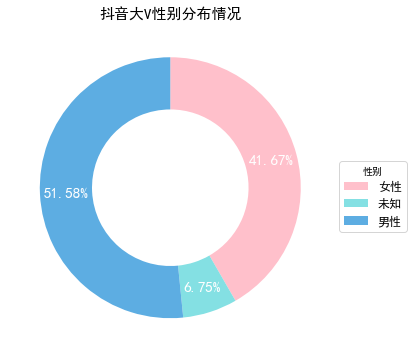

In [238]:
#第一步，画出扇形
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
label=['女性','未知','男性']
color= ["pink", "#84E0E3", "#5DADE2"] 
explode=[0,0,0]
pie=plt.pie(gender_com['count'],
            wedgeprops={'width':0.4},
            explode=explode,
            colors=color,
            autopct='%.2f%%',
            textprops = {'color': 'w','fontsize':15,'weight':'bold'},
            startangle=90,
            pctdistance=0.8,
            counterclock= False)
plt.title('抖音大V性别分布情况',size=15, weight='bold')
#图例
plt.legend(label,
          fontsize = 12,
          title = '性别',
          loc = 'best',
          bbox_to_anchor = (1, 0.6))

plt.show()


整体上看，大V的男女比例差异不大，除去未知的数据，比例基本是1:1

## 5.2 抖音大V获得点赞数情况

In [239]:
#对点赞数降序排列
df=df.sort_values('likes',ascending=False)
df.head(5)

,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_音乐,name,gender,category,fans,videos,likes,comments,shares,following
1,0,0,0,0,0,0,0,0,0,0,...,0,央视新闻,未知,政企,105648000,3681,3814571666,2603872833,1989050522,27.0
9,0,1,0,0,0,0,0,0,0,0,...,0,人民网,男性,政企,43422000,3280,1805419000,1004279775,751797832,4.0
24,0,0,0,0,0,0,0,0,0,0,...,0,四川观察,未知,政企,33391000,7285,1474252000,435859142,308755913,66.0
102,0,1,0,0,0,0,0,0,0,0,...,0,浙有正能量,男性,政企,19124000,3439,1274714000,254942909,86378664,25.0
0,0,0,0,0,0,0,0,0,0,0,...,0,人民日报,未知,政企,117259000,2427,1165446000,11906782048,9089061412,18.0


In [240]:
#获取TOP10数据
attr=df['name'][0:10]
v1=[float('%.1f' % (float(i)/100000000))for i in df['likes'][0:10]]

In [241]:
likes_top=pd.DataFrame({'attr':attr,'v1':v1})
likes_top

,attr,v1
1,央视新闻,38.1
9,人民网,18.1
24,四川观察,14.7
102,浙有正能量,12.7
0,人民日报,11.7
39,中国日报,10.8
96,环球网,9.8
89,湖北日报,9.6
10,一条小团团OvO,9.2
4,毒舌电影,8.2


In [242]:
attr=list(attr)
v1=list(v1)

<Figure size 432x432 with 0 Axes>

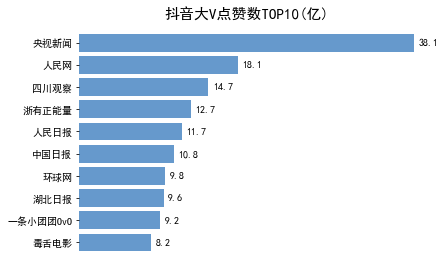

In [243]:
# 中文乱码和坐标轴负号处理。
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

#绘制条形图
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
bar = ax.barh(range(len(attr)), v1, color='#6699CC')
 
#为横向水平的柱图右侧添加数据标签。
for rect in bar:
    w = rect.get_width()
    ax.text(w+0.5, 
            rect.get_y()+rect.get_height()/2, 
            '{0:.1f}'.format(w),
            ha='left', 
            va='center')

#数组反转。
ax.invert_yaxis()
    
#设置Y轴纵坐标上的刻度线标签。
ax.set_yticks(range(len(attr)))
ax.set_yticklabels(attr)
 
#不要X横坐标上的label标签。
plt.xticks(())

#设置轴
axes=plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['bottom'].set_color('none')
axes.spines['left'].set_color('none')
plt.gca().margins(x=0,y=0)

plt.title('抖音大V点赞数TOP10(亿)', loc='center', fontsize='15',
          fontweight='bold', color='k',pad=15)
plt.show()

抖音大V点赞数TOP10(亿)图中可以看出：点赞数TOP10，除了「一条小团团」和「毒舌电影」，其他都是新闻媒体类的大V，而且点赞都是过亿。其中「浙有正能量」和「人民日报」这两个都是属于弘扬中国正能量的。国强则民无畏，对国家的关注也体现了国民浓浓的爱国情。

## 5.3 抖音大V点赞数分布

In [244]:
# 抖音大V点赞数分布情况
#获取点赞数分段
Bins = [0, 1000000, 5000000, 10000000, 25000000, 50000000, 100000000, 5000000000]
Labels = ['0-100', '100-500', '500-1000', '1000-2500', '2500-5000', '5000-10000', '10000以上']

len_stage = pd.cut(df['likes'],bins=Bins,labels=Labels).value_counts().sort_index()

In [245]:
likes_stage=pd.DataFrame({'Labels':Labels,'len_stage':len_stage})
likes_stage.head(7)

,Labels,len_stage
0-100,0-100,25
100-500,100-500,190
500-1000,500-1000,602
1000-2500,1000-2500,1541
2500-5000,2500-5000,1227
5000-10000,5000-10000,847
10000以上,10000以上,593


In [246]:
#获取数据
attr1 = len_stage.index.tolist()
v2 = len_stage.values.tolist()

<Figure size 1152x576 with 0 Axes>

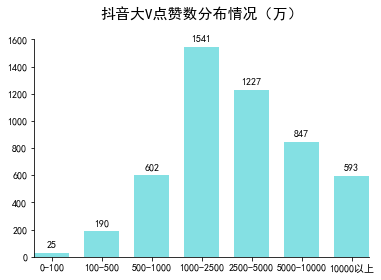

In [247]:
#绘制条形图
# 中文乱码和坐标轴负号处理
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

#绘制条形图
plt.figure(figsize=(16,8)) #不知道做什么
fig, ax1 = plt.subplots()
bar1 = ax1.bar(range(len(Labels)), len_stage, width=0.7, color='#84E0E3')

#设置x轴纵坐标上的刻度线标签
ax1.set_xticks(range(len(Labels)))
ax1.set_xticklabels(Labels)
plt.ylim((0,1600))

# plt.yticks(())

#设置标题
plt.title('抖音大V点赞数分布情况（万）', loc='center', fontsize='15',
          fontweight='bold', color='k',pad=20)

#设置轴
axes=plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

#设置x轴轴的边距值
plt.gca().margins(x=0)

#为柱图上方添加数据标签。label_type='center'
plt.bar_label(bar1, label_type='edge',padding=4)
plt.show()

抖音大V的点赞分布基本呈现正态分布。其间获得1000到5000（万）赞的大V数最多

## 5.4 抖音大V粉丝数TOP10（万）

In [248]:
#大v的粉丝数量
df = df.sort_values('fans',ascending=False)
df.head()

,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_音乐,name,gender,category,fans,videos,likes,comments,shares,following
0,0,0,0,0,0,0,0,0,0,0,...,0,人民日报,未知,政企,117259000,2427,1165446000,11906782048,9089061412,18.0
1,0,0,0,0,0,0,0,0,0,0,...,0,央视新闻,未知,政企,105648000,3681,3814571666,2603872833,1989050522,27.0
2,0,1,0,0,0,0,0,0,0,0,...,0,陈赫,男性,明星,68374000,422,570096000,430908721,117639297,131.0
3,0,0,0,0,0,0,0,0,0,0,...,0,Dear-迪丽热巴,未知,明星,49790000,29,181167000,202448645,151645265,0.0
4,0,1,0,0,0,0,1,0,0,0,...,0,毒舌电影,男性,剧情,46355000,616,820393000,28026109,13005392,24.0


In [249]:
attr2=df['name'][0:10]
v2=[float('%.1f' % (float(i)/10000))for i in df['fans'][0:10]]

In [250]:
fans_top=pd.DataFrame({'attr2':attr2,'v2':v2})
fans_top

,attr2,v2
0,人民日报,11725.9
1,央视新闻,10564.8
2,陈赫,6837.4
3,Dear-迪丽热巴,4979.0
4,毒舌电影,4635.5
5,陈翔六点半,4527.6
6,李佳琦Austin,4475.2
7,一禅小和尚,4366.0
8,高火火❤️,4362.6
9,人民网,4342.2


In [251]:
attr=list(attr2)
v2=list(v2)

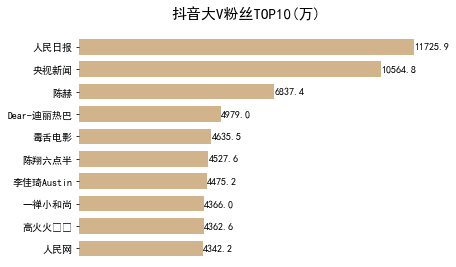

In [252]:
# 中文乱码和坐标轴负号处理。需要改
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

#绘制条形图
fig, ax2 = plt.subplots()
bar2 = ax2.barh(range(len(attr2)), v2, facecolor='tan',height=0.7)

#数组反转。
ax2.invert_yaxis()
 
#为横向水平的柱图右侧添加数据标签。
for rect in bar2:
    w = rect.get_width()
    ax2.text(w+2,
             rect.get_y()+rect.get_height()/2,
             '{0:.1f}'.format(w),
             ha='left',
             va='center')
    
#设置Y轴纵坐标上的刻度线标签。
ax2.set_yticks(range(len(attr2)))
ax2.set_yticklabels(attr2)
 
#不要X横坐标上的label标签。
plt.xticks(())

#设置轴
axes=plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['bottom'].set_color('none')
axes.spines['left'].set_color('none')

#设置y轴轴的边距值
plt.gca().margins(x=0, y=0)
 
plt.title('抖音大V粉丝TOP10(万)', loc='center', fontsize='15',
          fontweight='bold', color='k',pad=20)
plt.show()

粉丝数排行榜中更是将政企和明星类推向了高潮。其中*人民日报*和*央视新闻*粉丝均破亿。*热巴*和*陈赫*也作为明星中的话题顶流人物占据榜首。另外，以李佳琪等为首的直播带货也是异常火热，不愧是带货一哥

## 5.5 抖音大V评论数TOP10（亿）

In [253]:
#对评论数降序排列
df=df.sort_values('comments',ascending=False)
df.head()

,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_音乐,name,gender,category,fans,videos,likes,comments,shares,following
0,0,0,0,0,0,0,0,0,0,0,...,0,人民日报,未知,政企,117259000,2427,1165446000,11906782048,9089061412,18.0
2565,0,0,0,0,0,0,0,0,0,0,...,0,南昌广播电视台,未知,政企,3376000,3665,193714000,5309699303,2472341267,59.0
68,0,1,0,0,0,0,0,0,0,0,...,0,新华社,男性,政企,22443000,2133,647891000,4541685407,2997346720,42.0
78,0,1,0,0,0,0,0,0,0,0,...,0,林颜,男性,游戏,21002000,348,577174000,3567986581,1246322852,15.0
1034,1,0,0,0,0,0,0,0,0,0,...,0,周周啊,女性,美女,6047000,308,143379000,3258197032,609755900,127.0


In [254]:
#获取TOP10数据
attr=df['name'][0:10]
v1=[float('%.1f' % (float(i)/100000000))for i in df['comments'][0:10]]

In [255]:
likes_top=pd.DataFrame({'attr':attr,'v1':v1})
likes_top

,attr,v1
0,人民日报,119.1
2565,南昌广播电视台,53.1
68,新华社,45.4
78,林颜,35.7
1034,周周啊,32.6
2463,环球萌圈,31.2
2616,江南晚报,27.8
1649,冰城巡特警,26.9
75,快乐大本营,26.4
1,央视新闻,26.0


<Figure size 432x432 with 0 Axes>

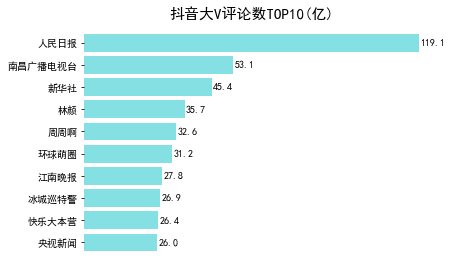

In [256]:
# 中文乱码和坐标轴负号处理。
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

#绘制条形图
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
bar = ax.barh(range(len(attr)), v1, color='#84E0E3')
 
#为横向水平的柱图右侧添加数据标签。
for rect in bar:
    w = rect.get_width()
    ax.text(w+0.5, 
            rect.get_y()+rect.get_height()/2, 
            '{0:.1f}'.format(w),
            ha='left', 
            va='center')

#数组反转。
ax.invert_yaxis()
    
#设置Y轴纵坐标上的刻度线标签。
ax.set_yticks(range(len(attr)))
ax.set_yticklabels(attr)
plt.tick_params(labelsize=10)
 
#不要X横坐标上的label标签。
plt.xticks(())

#设置轴
axes=plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['bottom'].set_color('none')
axes.spines['left'].set_color('none')
plt.gca().margins(x=0,y=0)

plt.title('抖音大V评论数TOP10(亿)', loc='center', fontsize='15',
          fontweight='bold', color='k',pad=15)
plt.show()

在抖音视频的评论区，总的来说，媒体类的视频评论较多。首当其中的是人民对事实政治的热情，使得*人民日报*和*新华社*的地位也是无人能撼动。  
作为综艺的常青藤--快乐大本营，快乐家族以及每一期的明星嘉宾，有快乐就有快乐家族。下面的评论更是催更，@自己准时观看，满满的青春和回忆。

## 5.6 抖音大V视频分享数TOP10(亿)

In [257]:
#对分享数降序排列
df=df.sort_values('shares',ascending=False)
df.head()

,gender_女性,gender_男性,category_二次元,category_交通汽车,category_亲子,category_农业,category_剧情,category_好物推荐,category_娱乐资讯,category_宠物,...,category_音乐,name,gender,category,fans,videos,likes,comments,shares,following
0,0,0,0,0,0,0,0,0,0,0,...,0,人民日报,未知,政企,117259000,2427,1165446000,11906782048,9089061412,18.0
414,0,1,0,0,0,0,0,0,0,0,...,0,跑腿小彭哥,男性,美女,9645000,286,150564000,353658468,4740366752,780.0
586,1,0,0,0,0,0,0,0,0,0,...,0,One💛美食,女性,美食,7938000,343,50925000,405839012,3682538388,107.0
509,0,1,0,0,0,0,0,0,0,0,...,0,骨往筋来（王杨雨凡）,男性,知识教育,8510000,736,59618000,1133767817,3511035098,321.0
855,1,0,0,0,0,0,0,0,0,0,...,0,丽姐家常菜,女性,美食,6631000,311,24821000,158056603,3461675413,91.0


In [258]:
attr=df['name'][0:10]
v1=[float('%.1f' % (float(i)/100000000))for i in df['shares'][0:10]]

In [259]:
likes_top=pd.DataFrame({'attr':attr,'v1':v1})
likes_top

,attr,v1
0,人民日报,90.9
414,跑腿小彭哥,47.4
586,One💛美食,36.8
509,骨往筋来（王杨雨凡）,35.1
855,丽姐家常菜,34.6
2463,环球萌圈,30.9
68,新华社,30.0
1169,赢在起点早教学园,28.1
1160,喂谷美食记,26.5
2565,南昌广播电视台,24.7


<Figure size 864x864 with 0 Axes>

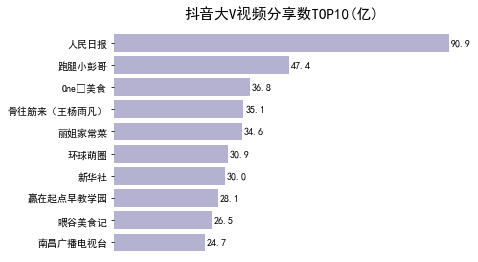

In [260]:
# 中文乱码和坐标轴负号处理。
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

#绘制条形图
plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
bar = ax.barh(range(len(attr)), v1, color='darkslateblue',alpha=0.4)
 
#为横向水平的柱图右侧添加数据标签。
for rect in bar:
    w = rect.get_width()
    ax.text(w+0.5, 
            rect.get_y()+rect.get_height()/2, 
            '{0:.1f}'.format(w),
            ha='left', 
            va='center')

#数组反转。
ax.invert_yaxis()
    
#设置Y轴纵坐标上的刻度线标签。
ax.set_yticks(range(len(attr)))
ax.set_yticklabels(attr)
plt.tick_params(labelsize=10)
 
#不要X横坐标上的label标签。
plt.xticks(())

#设置轴
axes=plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['bottom'].set_color('none')
axes.spines['left'].set_color('none')
plt.gca().margins(x=0,y=0)

plt.title('抖音大V视频分享数TOP10(亿)', loc='center', fontsize='15',
          fontweight='bold', color='k',pad=15)
plt.show()

不得不说，分享则增加了一层社交属性的面纱。娱乐性质淡化，而美食，养生，知识这类视频可能晚到，但绝不或迟到，也从一众账号中脱颖而出。

## 5.7 各类型点赞数汇总分布图

In [261]:
# 分组求和
likes_type_message = df.groupby(['category'])
likes_type_com = likes_type_message['likes'].agg(['sum'])
likes_type_com.reset_index(inplace=True)

# 依据求和总数降序排列
likes_type_com = likes_type_com.sort_values('sum',ascending=False)
likes_type_com.head()

,category,sum
22,美女,55091049928
13,政企,43515584666
12,搞笑,29635110841
18,游戏,17213606000
4,剧情,14463513000


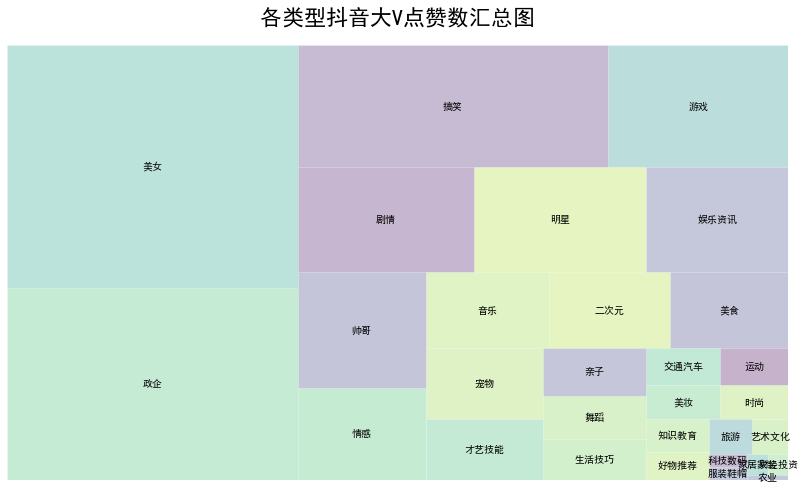

In [262]:
# 处理数据(将数据转化为列表形式)
category = likes_type_com['category'].tolist()
num = likes_type_com['sum'].tolist()

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
plot = squarify.plot(sizes = num, # 方块面积大小
                     label = category, # 指定标签
                     #color = colors, # 指定自定义颜色
                     alpha = 0.3, # 指定透明度
                     edgecolor = 'white', # 设置边界框
                     linewidth =0.5 # 设置边框宽度
                    )
# 设置标签大小
# plt.rc('font', size=14) #无效！
# 设置标题大小
ax.set_title('各类型抖音大V点赞数汇总图',fontsize = 22,pad=20)
# 去除坐标轴
ax.axis('off')
#数组反转。
ax.invert_yaxis()
# 去除上边框和右边框刻度
ax.tick_params(top = 'off', right = 'off')
# 显示图形
plt.show()

在各类视频的点赞区，人们终于可以放肆一把。毕竟谁不喜欢欣赏美呢，美女和帅哥在手机上养养眼，提高一下审美也是不错嘀！另外，“打工人”下班后，搞笑和剧情类视频配上可乐炸鸡，难得的放松时间，好生惬意！

## 5.8 各类型粉丝数汇总分布图

In [263]:
# 分组求和
fans_type_message = df.groupby(['category'])
fans_type_com = likes_type_message['fans'].agg(['sum'])
fans_type_com.reset_index(inplace=True)

# 依据求和总数降序排列
fans_type_com = fans_type_com.sort_values('sum',ascending=False)
fans_type_com.head()

,category,sum
22,美女,5835938441
12,搞笑,2543952775
16,明星,2384436000
13,政企,1376217000
18,游戏,1272746174


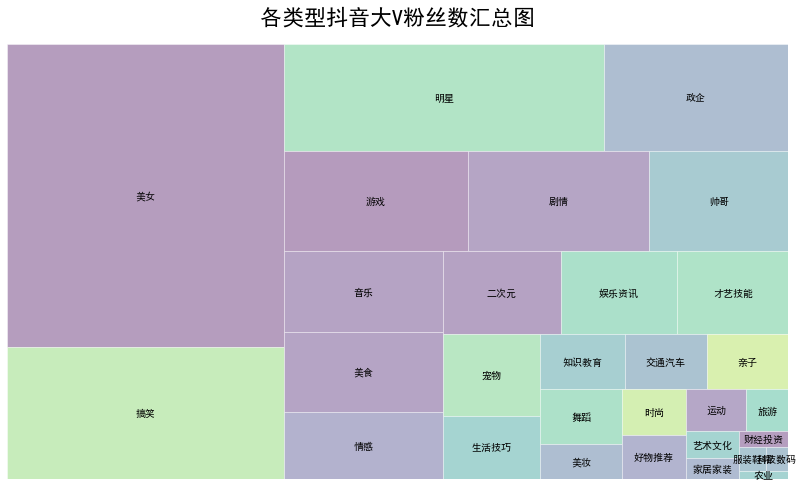

In [264]:
#### 处理数据(将数据转化为列表形式)
category = fans_type_com['category'].tolist()
num = fans_type_com['sum'].tolist()

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
plot = squarify.plot(sizes = num, # 方块面积大小
                     label = category, # 指定标签
                     #color = colors, # 指定自定义颜色
                     alpha = 0.4, # 指定透明度
                     edgecolor = 'white', # 设置边界框
                     linewidth =1 # 设置边框宽度
                    )
# 设置标签大小
# plt.rc('font', size=14) #无效！
# 设置标题大小
ax.set_title('各类型抖音大V粉丝数汇总图',fontsize = 22,pad=20)
# 去除坐标轴
ax.axis('off')
#数组反转。
ax.invert_yaxis()
# 去除上边框和右边框刻度
ax.tick_params(top = 'off', right = 'off')
# 显示图形
plt.show()

在关注的抖音类型中，也延续了各类点赞分布的布局，美女、搞笑游戏居于榜首，另外还增加了音乐美食宠物的的比重，这就是是生活吧。

## 5.9 抖音大V省份分布情况

In [265]:
#处理数据，得到各省份的数量分布
df_China.head()

,country,province,city,location
0,中国,北京,北京,北京
1,中国,北京,北京,北京
2,中国,上海,上海,上海
4,中国,广东,广州,广州
5,中国,云南,昆明,NaN


In [266]:
# 分组计数，并按降序排列
df_num = df_China.groupby("province")["province"].agg(count="count")
df_num = df_num.sort_values('count',ascending=False)
df_num.head()

,count
province,
北京,695
广东,596
浙江,438
四川,317
上海,289


In [267]:
df_province = df_num.index.values.tolist()
df_count = df_num["count"].values.tolist()

In [268]:
#导入必要的包
#! pip install pyecharts
# ! pip install echarts-china-provinces-pypkg
from pyecharts.charts import Map
from pyecharts import options as opts

In [269]:
#绘制地图
# 初始化配置
map = Map(init_opts=opts.InitOpts(width="1000px", height="600px"))
# 中国地图
map.add("", [list(z) for z in zip(df_province, df_count)], "china")
# 设置全局配置项，标题、工具箱(下载图片)、颜色图例
map.set_global_opts(title_opts=opts.TitleOpts(title="抖音大V省份分布情况", pos_left="center", pos_top="0"),
                    toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}}),
                    # 设置数值范围0-600，is_piecewise标签值连续
                    visualmap_opts=opts.VisualMapOpts(max_=600, is_piecewise=False))
map.render_notebook()

最后，在抖音大V省份分布情况中，可以看出西藏自治区没有大V，所以没有颜色。另外大V主要集中在长江黄河中下游，尤其是北上广深等一二线城市，其中位列前五的有北京、广东、浙江、四川和上海。  
四川能够上榜也和四川政府大力推动促进经济，旅游业，媒体业等发展有关。作为新晋宜居城市，成都美食和美景在全国都是出了名的，因此也吸引了大量博主来到成都去发展定居。

# 6.总结和建议

**总结以上信息：**

本项目通过机器学习，基于视频类型、视频数量，性别以及关注数的数据集构建点赞数的预测模型，最佳拟合线：截距a= 5193818.101527758 ，回归系数b= [-1.72849267e+05 -1.61047997e+05  3.68785563e+05  2.20948652e+06
 -5.82486442e+05 -5.97031639e+05  7.53629389e+05  3.93774717e+05
 -8.98660627e+05  1.08948305e+06 -9.41136806e+05  4.00225984e+05
 -9.42675926e+04  5.78766101e+05  1.22748861e+06  2.83474181e+06
 -1.29529911e+06 -1.15134061e+06  1.53726932e+06  3.15512698e+06
 -4.35692411e+05 -7.38576664e+05 -8.77593937e+05 -1.31726680e+06
 -1.88762438e+06  5.10631040e+05 -5.65352434e+05  7.14281802e+05
 -8.26511287e+05 -1.12455277e+06 -1.36876038e+06 -1.07153700e+06
  4.37673945e+02]。其模型评估的决定系数为0.6800424481363138

依照项目问题得出：
* 1、坐拥更高的粉丝数的抖音大V，点赞数、评论数与分享数更高。
* 2、视频的数量与粉丝数、点赞数、评论数与分享数具有一定的相关性，但是相关性不大，视频质量和调动观众的情绪才是视频传播的更重要原因。  
* 3、大众更偏向于关注、点赞和评论的视频种类是政企、明星、娱乐搞笑、剧情和游戏类视频。但是实际分享的却是政企、美食、知识和生活技巧类短视频。
* 4、大V门并没有相同的回关率。从相关系数中可以看出，following与fans和likes的相关性极低，主要表现在明星和各种官方账号。

上面的用户基本情况表明抖音用户们娱乐政治两不误，正可谓是为了国家大事小情操碎了心。不过也能体现社会的“打工人的本质”。平时独处的时候在抖音上放肆的刷一刷自己喜欢的，可以舒缓心情释放压力，但是真正涉及到社交面，还是要维护一下自己的形象滴。

**建议：**  

最后，需要引起关注的是，大V的回关率不高，与上亿级别的粉丝数，点赞数和评论形成极大差距。大V们加班加点，目的就是抢占用户的时间。最后想说不要让短视频消磨掉你大部分时间,毕竟还有很多事比刷抖音有趣。身边人，身边事，可能更值得关注。